**NAME: X.O.mto
<br>
Github: https://github.com/Somto-Dera/ECGR5090-Machine-Learning.git**

# Homework 4
In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

 

**STEPS**
<br>
* Import Needed libraries


* Problem 1: SVC
    * Data Preparation
        * Load and understand data
        * Perform minor EDA
    * Split dataset into X and y variables
    * Split the data into training and test data set
    * Scale and PCA set
    * Explore different ks
    * Build the SVC models, for different kernel tricks
    * Evaluate the model
        * Calculate accuracy, recall, precision and log loss error
        * Confusion Metrics
    

* Problem 2: SVR
    * Data Preparation
        * Load and understand data
        * Perform minor EDA
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale and PCA set
    * Explore different ks
    * Build the SVR models, for different kernel tricks
    * Evaluate models

<br> 

**Import Library**

In [1]:
# pandas is used for data manipulation and analysis
import pandas as pd     

# numpy is used for array and matrics manipulation
import numpy as np

# matplotlib is used for data visualisation
import matplotlib.pyplot as plt

# seaborn is used for data visualization (heat map)
import seaborn as sns

# sklearn-metrics is used for measuring classification peformance
from sklearn import metrics

from sklearn.metrics import mean_squared_error as mse

from sklearn import model_selection

# sklearn-logreg is used for creating logreg model
from sklearn.linear_model import LogisticRegression

# sklearn-traintestsplit is used for spliting dataset
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

# sklearn-scaler is used for scaling dataset
from sklearn.preprocessing import StandardScaler

# sklearn-naive_bayes is used for creating GNB model
from sklearn.naive_bayes import GaussianNB

# sklearn-dataset is used for breast cancer dataset
from sklearn.datasets import load_breast_cancer

# sklearn-decomposition is used for performing PCA
from sklearn.decomposition import PCA

# sklearn-discriminant_analysis is used for performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# "Linear Support vector classifier" 
from sklearn.svm import SVC, SVR

# 
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Problem 1 :

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
* Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
* Plot your classification accuracy, precision, and recall over a different number of Ks. 
* Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
* Compare your results against the logistic regression that you have done in homework 3.
Make sure to explain and elaborate your results.


<br> 

**Import and Display the first 5 rows of the dataset**

In [2]:
# load dataset into diabetes variable
cancer_data = load_breast_cancer()

# To get first five rows from the dataset default value
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# create cancer variaable and pass feature columns into it
cancer_dataframe = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# display 1-5 rows
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# display last 5 rows
cancer_dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


* mean radius = mean of distances from center to points on the perimeter
* mean texture = standard deviation of gray-scale values
* mean perimeter = mean size of the core tumor
* mean area = 
* mean smoothness = mean of local variation in radius lengths
* mean compactness = mean of perimeter^2 / area - 1.0
* mean concavity = mean of severity of concave portions of the contour
* mean concave points = mean for number of concave portions of the contour
* mean symmetry =
* mean fractal dimension = mean for "coastline approximation" - 1
* radius error = standard error for the mean of distances from center to points on the perimeter
* texture error = standard error for standard deviation of gray-scale values
* perimeter error =
* area error =
* smoothness error = standard error for local variation in radius lengths
* compactness error = standard error for perimeter^2 / area - 1.0
* concavity error = standard error for severity of concave portions of the contour
* concave points error = standard error for number of concave portions of the contour
* symmetry error =
* fractal dimension error = standard error for "coastline approximation" - 1
* worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
* worst texture = "worst" or largest mean value for standard deviation of gray-scale values
* worst perimeter =
* worst smoothness = "worst" or largest mean value for local variation in radius lengths
* worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
* worst concavity = "worst" or largest mean value for severity of concave portions of the contour
* worst concave points = "worst" or largest mean value for number of concave portions of the contour
* worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

In [5]:
# display shape of dataset
cancer_dataframe.shape

(569, 30)

In [6]:
cancer_dataframe.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
# description of dataset
cancer_dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# concat target label column to cancer dataset
cancer_dataframe['targLabel'] = pd.DataFrame(load_breast_cancer().target)

# display 1-5 rows
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targLabel
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# display last 5 rows
cancer_dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targLabel
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
# check for empty cell in dataset and sort
cancer_dataframe.isnull().sum().sort_values(ascending=False)[:10]

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
dtype: int64

In [11]:
# check column datatype
cancer_dataframe.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      



cancer_dataframe['targLabel'].replace(0, 'Benign',inplace=True)
cancer_dataframe['targLabel'].replace(1, 'Malignant',inplace=True)
cancer_dataframe



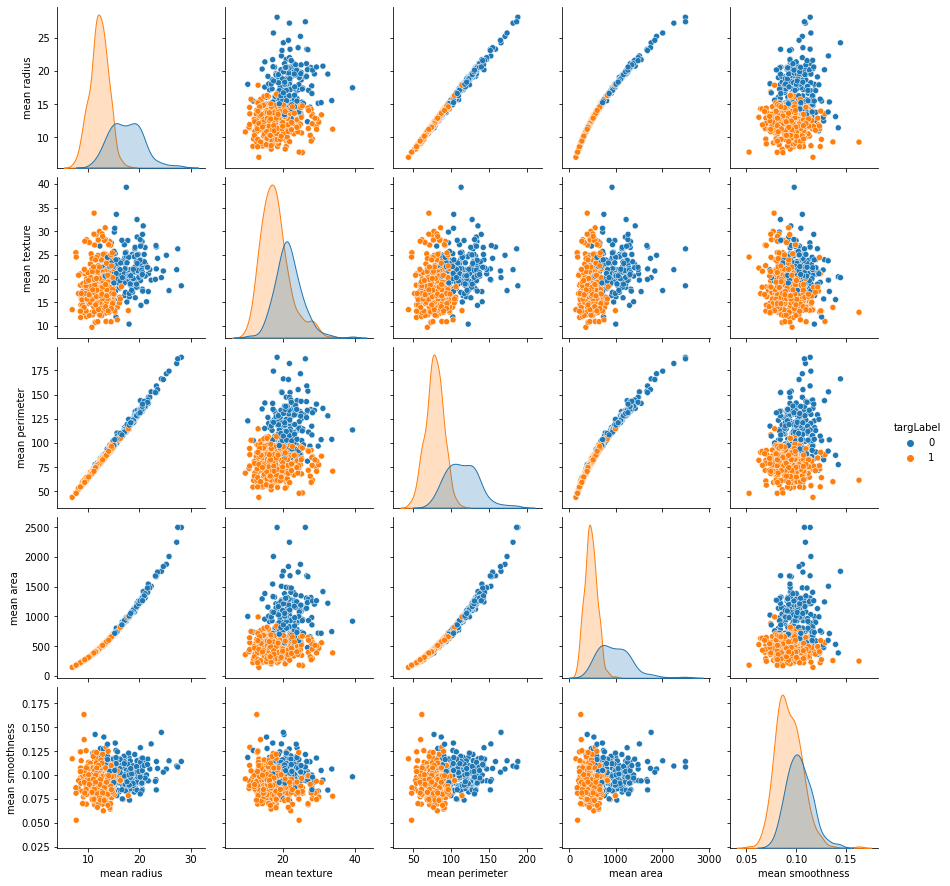

In [12]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(cancer_dataframe, hue = 'targLabel', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])

In [13]:
cancer_dataframe_positive = cancer_dataframe[cancer_dataframe['targLabel'] == 1]
print('Training examples with cancer test status 1 are = ', cancer_dataframe_positive.shape[0])

cancer_dataframe_negative = cancer_dataframe[cancer_dataframe['targLabel'] == 0]
print('Training examples with cancer test status 0 are = ', cancer_dataframe_negative.shape[0])


Training examples with cancer test status 1 are =  357
Training examples with cancer test status 0 are =  212


<br>

---

---

---

**Function Definitions**

In [14]:
def plot_confusion_matrix(y_test, y_predict):
    
    c_m = np.array(metrics.confusion_matrix(y_test, y_predict, labels=[1,0]))
    conf_matrix = pd.DataFrame(c_m, index=['is_cancer', 'is_healthy'],
                             columns=['predicted_cancer','predicted_healthy'])
    
    sns.heatmap(conf_matrix, annot=True)
    

In [15]:
def plot_ks(kth_term = None, accuracy_list = None, classification_error_list = None, precision_list = None, recall_list = None, kernel_trick = None):
    
    if precision_list is not None:
        
        # Plot all model metrics along different ks
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ki = np.arange(1, kth_term, step=1)
        plt.xticks(np.arange(0, kth_term, step=1))
        ax.plot(ki, accuracy_list, color='lightblue', marker='o', linewidth=3, label='Acc')
        ax.plot(ki, classification_error_list, color='orange', marker='o', linewidth=3, label='Loss')
        ax.plot(ki, precision_list, color='darkgreen', marker='o', linewidth=3, label='Precision')
        ax.plot(ki, recall_list, color='yellow', marker='o', linewidth=3, label='Recall')
        plt.xlabel('Number of Components(K)')
        plt.ylabel('Model Metrics')
        ax.grid(axis='x')
        
        ax.set_xlim(0.0, kth_term)
        
        plt.legend()
        plt.title("Model Evaluation with range ks - Kernel Trick: "+kernel_trick)
        plt.show()
        
    else:
        
        # Plot all model metrics along different ks
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ki = np.arange(1, kth_term, step=1)
        plt.xticks(np.arange(0, kth_term, step=1))
        ax.plot(ki, accuracy_list, color='darkblue', marker='o', linewidth=3, label='Acc')
        plt.xlabel('Number of Components(K)')
        plt.ylabel('Model Metrics')
        ax.grid(axis='x')
        
        ax.set_xlim(0.0, kth_term)
        
        plt.legend()
        plt.title("Model Evaluation with range ks - Kernel Trick: "+kernel_trick)
        plt.show()
        
        

In [16]:
def svm_model_init(x_train, x_test, kernel_trick, k_term, model_type):
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Create and fit PCA object
    # Transforming x_train and x_test
    pca = PCA(n_components=k_term)
    scaler = StandardScaler()
    
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    
    if model_type == "svc":
        
        if kernel_trick == "linear":
            
            # 1. Instantiate
            #svm_model = SVC(kernel='linear', C=1e3)
            svm_model = SVC(kernel='linear')
            
        elif kernel_trick == "rbf":
            
            # 1. Instantiate
            svm_model = SVC(kernel='rbf', gamma=1)
            #svm_model = SVC(kernel='rbf', gamma=0.1)
            
        elif kernel_trick == "poly":
            
            # 1. Instantiate
            svm_model = SVC(kernel='poly', gamma='auto', degree=2)
            #svm_model = SVC(kernel='poly', degree=2)
            
        else:
            
            # throw error
            raise NameError("Invalid kern type for svc")

        
    elif model_type == "svr":
        
        if kernel_trick == "linear":
            
            # 1. Instantiate
            #svm_model = SVR(kernel='linear', C=1e3)
            svm_model = SVR(kernel='linear', C=1e8)
            
        elif kernel_trick == "rbf":
            
            # 1. Instantiate
            #svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
            svm_model = SVR(kernel='rbf', C=1e8, gamma=0.01)
            
        elif kernel_trick == "poly":
            
            # 1. Instantiate
            #svm_model = SVR(kernel='poly', C=1e3, degree=2)
            svm_model = SVR(kernel='poly', C=1e2, degree=2)
            
        else:
            
            # throw error
            raise NameError("Invalid kern type for svr")
        
    else:
        
        # throw error
        raise NameError("Invalid model type")
        
        
    # return selected model, principle components train and test sets
    return svm_model, x_train, x_test

In [17]:
def find_optimal_k(kern_trick, max_kth, model_type, X_train, X_test):
        
    # define the maximum k
    kth_term = max_kth
    
    # create lists to store different model metrics
    acc_lst = []
    class_err_lst = []
    prec_lst = []
    recall_lst = []
    
    optimal_accuracy = 0
    kth = 0
    
    # train multiple log regression models with different ks
    for k in range(1,kth_term):
        
        #print("k = ", k)
        
        # kt = int(k)
        
        
        # 1. Instantiate model
        model, x_train, x_test = svm_model_init(x_train = X_train, x_test = X_test, 
                                                kernel_trick = kern_trick, k_term = k, 
                                                model_type = model_type)
            
        # 2. fit the train data and test the model
        model.fit(x_train, y_train)
            
        # 3. Predicting the test set results
        y_pred = model.predict(x_test)
        
        
        if model_type == "svc":
            
            # append results to predefined list variables
            acc_lst.append(metrics.accuracy_score(y_test, y_pred))
            class_err_lst.append(1 - metrics.accuracy_score(y_test, y_pred))
            prec_lst.append(metrics.precision_score(y_test, y_pred))
            recall_lst.append(metrics.recall_score(y_test, y_pred))
            
            # check for the highest accuracy
            if ((metrics.accuracy_score(y_test, y_pred)) > optimal_accuracy):
                
                optimal_accuracy = (metrics.accuracy_score(y_test, y_pred))
                kth = k
                
            else:
                
                continue
                
            
        
        elif model_type == "svr":
            
            # append results to predefined list variables
            acc_lst.append(metrics.r2_score(y_test, y_pred))
            
                        
            # check for the highest accuracy
            if ((metrics.r2_score(y_test, y_pred)) > optimal_accuracy):
                
                optimal_accuracy = (metrics.r2_score(y_test, y_pred))
                kth = k
                
            else:
                
                continue
                
                
        else:
            
            # throw error
            raise NameError("Invalid model type")
                
            

    
    if model_type == "svc":
        
        # plot model metrics with different ks
        plot_ks(kth_term = kth_term, accuracy_list = acc_lst, classification_error_list = class_err_lst, precision_list = prec_lst, recall_list = recall_lst, kernel_trick = kern_trick)
        
        print(" ")
        print("K : "+str(kth)+" | Highest Accuraccy is : "+str(optimal_accuracy))
        
        
        # return the optimal k term
        return kth
    
    elif model_type == "svr":
        
        # plot model metrics with different ks
            
        plot_ks(kth_term = kth_term, accuracy_list = acc_lst, classification_error_list = None, precision_list = None, recall_list = None, kernel_trick = kern_trick)
            
        #print(" ")
        #print("K : "+str(kth)+" | Highest Accuraccy is : "+str(optimal_accuracy))
            
            
        # return the optimal k term
        return kth
    
    else:
        
        # throw error
        raise NameError("Invalid model type")
            

    

In [18]:
def svm_model(X_train, X_test, y_train, y_test, kern, k, model_type):
    
    # Create and fit PCA object
    # Transforming x_train and x_test
    ##pca_final = PCA(n_components=k)
    ##principalComponents_train = pca_final.fit_transform(X_train)
    ##principalComponents_test = pca_final.transform(X_test)
    
    # 1. Instantiate model
    model, x_train, x_test = svm_model_init(x_train = X_train, x_test = X_test, kernel_trick = kern, k_term = k, model_type = model_type)
    
    # 2. fit the train data and test the model.
    model.fit(x_train, y_train)
        
    # 3. Predicting the test set results
    y_pred = model.predict(x_test)
    
    if model_type == "svc":
        
        # 4. plot confusion matrix
        plot_confusion_matrix(y_test = y_test, y_predict = y_pred)
        
        # 5. model report
        print(metrics.classification_report(y_test, y_pred))
        
        
    else:
        
        return x_test, x_train, y_pred, y_train
        
        
        
        # 4. 
        #X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
        #X_grid = X_grid.reshape((len(X_grid), 1))
        #plt.scatter(X, y, color = 'red')
        #plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
        #plt.title('Truth or Bluff (SVR)')
        #plt.xlabel('Position level')
        #plt.ylabel('Salary')
        #plt.show()
    


In [19]:
# Split dataset in features and target sets
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

# Features, '[]' is used because X is a matrix
X = cancer_dataframe[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = cancer_dataframe.targLabel

# Print out first five rows of the X set
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Print out first five rows of the y set
y.head()

0    0
1    0
2    0
3    0
4    0
Name: targLabel, dtype: int64

In [21]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (455, 30)
X_test dimension=  (114, 30)
y_train dimension=  (455,)
y_test dimension=  (114,)


* **kernel_tricks = ['linear', 'poly', 'rbf']**

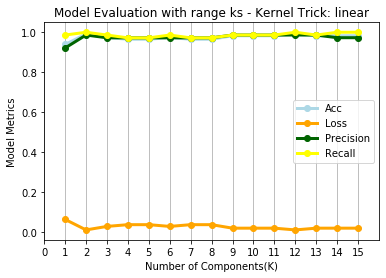

 
K : 2 | Highest Accuraccy is : 0.9912280701754386


In [22]:
# linear kernelization
ktrick = "linear"
mod_type = "svc"
kth_term = 16

opt_k = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



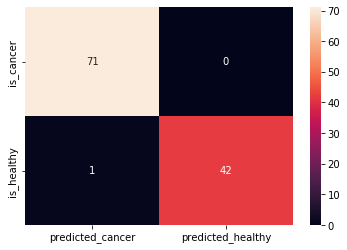

In [23]:
svm_model(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, kern = ktrick, k = opt_k, model_type = mod_type)

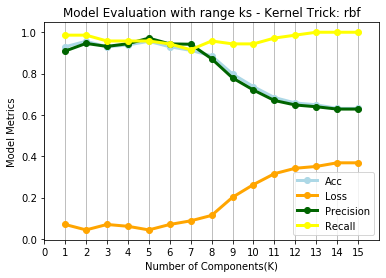

 
K : 2 | Highest Accuraccy is : 0.956140350877193


In [24]:
# rbf kernelization
ktrick = "rbf"
mod_type = "svc"

opt_k = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



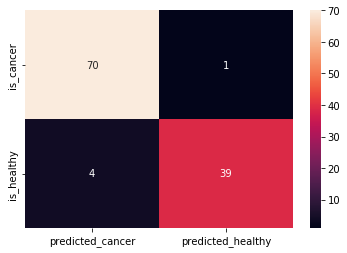

In [25]:
svm_model(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, kern = ktrick, k = opt_k, model_type = mod_type)

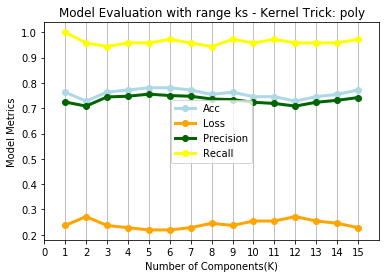

 
K : 5 | Highest Accuraccy is : 0.7807017543859649


In [26]:
# poly kernelization
ktrick = 'poly'
mod_type = "svc"

opt_k = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.76      0.96      0.84        71

    accuracy                           0.78       114
   macro avg       0.82      0.72      0.74       114
weighted avg       0.80      0.78      0.76       114



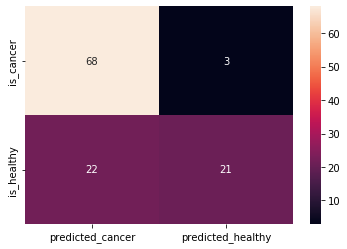

In [27]:
svm_model(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, kern = ktrick, k = opt_k, model_type = mod_type)

## Problem 2 :

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

- Plot your regression model for SVR similar to the sample code provided on Canvas.
- Compare your results against linear regression with regularization loss that you already did in homework1. 
- Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
- Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

Make sure to explain and elaborate your results.

<br>

### Import and Display the first 5 rows of the dataset

In [28]:
housing = pd.read_csv('Housing.csv')
housing.head() # To get first n rows from the dataset default value of n is 5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
# select required columns

used_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
housing_dataset = housing[ used_cols ]
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [30]:
# check to find columns with object datatypes
housing_dataset.basement.unique()

array(['no', 'yes'], dtype=object)

In [31]:
# perform one hot encoding
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    tempdataset = pd.get_dummies(housing_dataset[column], prefix=column)
    housing_dataset = pd.merge(
        left=housing_dataset,
        right=tempdataset,
        left_index=True,
        right_index=True,
    )
    housing_dataset = housing_dataset.drop(columns=column)
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [32]:
# check for empty cell in dataset and sort
housing_dataset.isnull().sum().sort_values(ascending=False)[:10]

price                  0
area                   0
prefarea_no            0
airconditioning_yes    0
airconditioning_no     0
hotwaterheating_yes    0
hotwaterheating_no     0
basement_yes           0
basement_no            0
guestroom_yes          0
dtype: int64

In [33]:
# display shape of dataset
housing_dataset.shape

(545, 18)

In [34]:
housing_dataset.index

RangeIndex(start=0, stop=545, step=1)

In [35]:
# description of dataset
housing_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.141284,0.858716,0.822018,0.177982,0.649541,0.350459,0.954128,0.045872,0.684404,0.315596,0.765138,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.348635,0.382849,0.382849,0.477552,0.477552,0.209399,0.209399,0.465180,0.465180,0.424302,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# check column datatype
housing_dataset.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
parking                int64
mainroad_no            uint8
mainroad_yes           uint8
guestroom_no           uint8
guestroom_yes          uint8
basement_no            uint8
basement_yes           uint8
hotwaterheating_no     uint8
hotwaterheating_yes    uint8
airconditioning_no     uint8
airconditioning_yes    uint8
prefarea_no            uint8
prefarea_yes           uint8
dtype: object

In [37]:
# convert datatype of these columns from uint8 to int64
housing_dataset[['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no',
                 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no',
                 'airconditioning_yes', 'prefarea_no', 
                 'prefarea_yes']] = housing_dataset[['mainroad_no', 'mainroad_yes', 'guestroom_no', 
                                                     'guestroom_yes', 'basement_no', 'basement_yes', 
                                                     'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 
                                                     'airconditioning_yes', 'prefarea_no', 'prefarea_yes']].astype('int64')

In [38]:
# check column datatype
housing_dataset.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
parking                int64
mainroad_no            int64
mainroad_yes           int64
guestroom_no           int64
guestroom_yes          int64
basement_no            int64
basement_yes           int64
hotwaterheating_no     int64
hotwaterheating_yes    int64
airconditioning_no     int64
airconditioning_yes    int64
prefarea_no            int64
prefarea_yes           int64
dtype: object

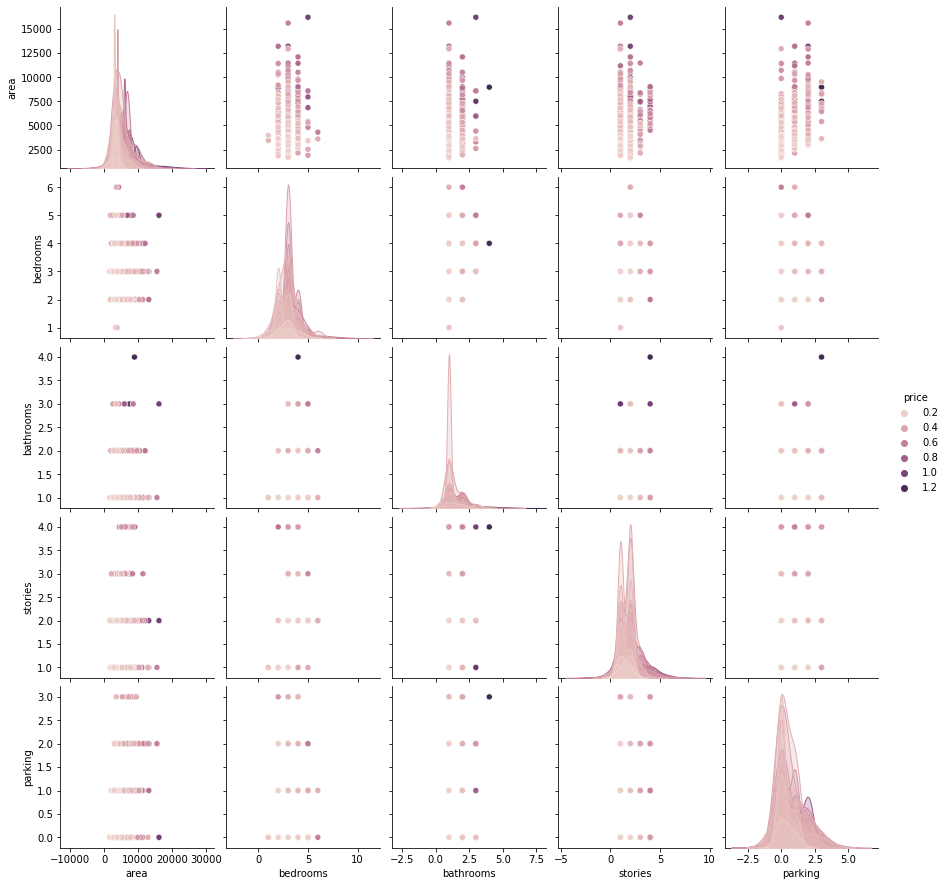

In [39]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(housing_dataset, hue = 'price', vars = ['area', 'bedrooms', 'bathrooms','stories','parking'])

In [40]:
# Split dataset in features and target sets
feature_cols = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
                'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes',
                'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
                'prefarea_no', 'prefarea_yes' ]


# Features, '[]' is used because X is a matrix
X = housing_dataset[ feature_cols ]

# Target variable, '.Outcome' is used because y is a vector
y = housing_dataset['price']


# Print out first five rows of the X set
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [41]:
# Print out first five rows of the y set
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [42]:
# Check for cols with correllation above 0.9 and remove them

corrmat = X.corr() 
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [43]:
# split X and y into training, testing sets and print out it's shape
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42 )
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (436, 17)
X_test dimension=  (109, 17)
y_train dimension=  (436,)
y_test dimension=  (109,)


<br>

**Find optimal ks for each kernel trick "Linear, Poly and RBF"**

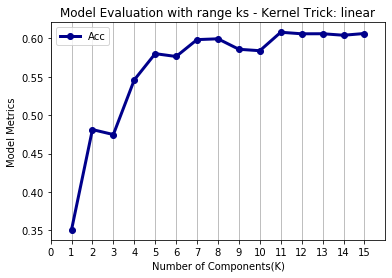

Optimal K:  11


In [44]:
# linear kernel trick
ktrick = "linear"
mod_type = "svr"
kth_term = 16

opt_k_lin = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)
print("Optimal K: ", opt_k_lin)

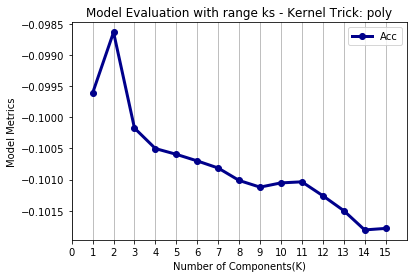

Optimal K: 2


In [45]:
# polynomial kernel trick
ktrick = 'poly'
mod_type = "svr"

opt_k_poly = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)
print("Optimal K: 2")

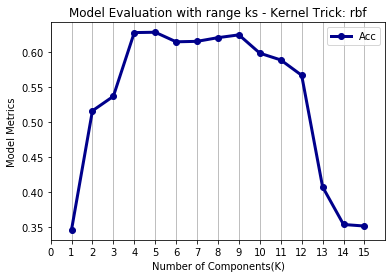

Optimal K:  5


In [46]:
# rbf kernel trick
ktrick = "rbf"
mod_type = "svr"

opt_k_rbf = find_optimal_k(kern_trick = ktrick, max_kth = kth_term, model_type = mod_type, X_train = X_train, X_test = X_test)
print("Optimal K: ", opt_k_rbf)

<br>

**Create models with diff kernel tricks using optimal ks**

In [47]:
#svr_lin = SVR(kernel='linear')
svr_lin = SVR(kernel='linear', C=1e8)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Create and fit PCA object
# Transforming x_train and x_test
pca = PCA(n_components = opt_k_lin)
print(opt_k_lin)
    
x_train = pca.fit_transform(x_train)
x_test_lin = pca.transform(x_test)

y_lin = svr_lin.fit(x_train, y_train).predict(x_test_lin)

print("Regression Score: ", metrics.r2_score(y_test, y_lin))
m_l = mse(y_test, y_lin)
print('MSE :',m_l)

11
Regression Score:  0.6078384324833279
MSE : 1982208190935.5645


In [48]:
svr_poly = SVR(kernel='poly', C=1e8, degree=2) 

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Create and fit PCA object
# Transforming x_train and x_test
#pca = PCA(n_components=2)
pca = PCA(n_components = 2)
print(2)
    
x_train = pca.fit_transform(x_train)
x_test_poly = pca.transform(x_test)

y_poly = svr_poly.fit(x_train, y_train).predict(x_test_poly)

print("Regression Score: ", metrics.r2_score(y_test, y_poly))
m_l = mse(y_test, y_poly)
print('MSE :',m_l)

2
Regression Score:  0.17543490509036475
MSE : 4167822194917.032


In [49]:
svr_rbf = SVR(kernel='rbf', C=1e8, gamma=0.01)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Create and fit PCA object
# Transforming x_train and x_test
#pca = PCA(n_components=2)
pca = PCA(n_components = opt_k_rbf)
    
x_train = pca.fit_transform(x_train)
x_test_rbf = pca.transform(x_test)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test_rbf)

print("Regression Score: ", metrics.r2_score(y_test, y_rbf))
m_l = mse(y_test, y_rbf)
print('MSE :',m_l)

Regression Score:  0.6138755914550487
MSE : 1951692946824.561


<br>

**HW1**

In [50]:
# Fitting simple linear regression to training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)

print("Regression Score: ", metrics.r2_score(y_test, y_pred))
m_l = mse(y_test, y_pred)
print('MSE :',m_l)

Regression Score:  0.643729608661411
MSE : 1800793719718.9705


**Observation**
- From In[23],In[25] and In[27] we seen that the k trick perform okay but the svc model with the poly kernel trick perormed worst. Compared to model from homework, the rbf and linear kernel models perform better. However the poly kernel doesnt. The poly kernel method might need some extra tuning.

- From the above you can find that the linear regresion model performed(In[50]) returns a better performance than the SVr models (In[47], [48] and [49]). This may be due to the need for better tunning my SVR models. In general the models didn't all that well.

## APPENDIX

---

### Reference table showing metrics terms and their definitions

<br><br>

|  TERM | DESCRIPTION  |
|---|---|
|**TRUE POSITIVES** | The number of "true" classes correctly predicted to be true by the model. <br><br> `TP = Sum of observations predicted to be 1 that are actually 1`<br><br>The true class in a binary classifier is labeled with 1.|
|**TRUE NEGATIVES** | The number of "false" classes correctly predicted to be false by the model. <br><br> `TN = Sum of observations predicted to be 0 that are actually 0`<br><br>The false class in a binary classifier is labeled with 0.|
|**FALSE POSITIVES** | The number of "false" classes incorrectly predicted to be true by the model. This is the measure of **Type I error**.<br><br> `FP = Sum of observations predicted to be 1 that are actually 0`<br><br>Remember that the "true" and "false" refer to the veracity of your guess, and the "positive" and "negative" component refer to the guessed label.|
|**FALSE NEGATIVES** | The number of "true" classes incorrectly predicted to be false by the model. This is the measure of **Type II error.**<br><br> `FN = Sum of observations predicted to be 0 that are actually 1`<br><br>|
|**TOTAL POPULATION** | In the context of the confusion matrix, the sum of the cells. <br><br> `total population = tp + tn + fp + fn`<br><br>|
|**SUPPORT** | The marginal sum of rows in the confusion matrix, or in other words the total number of observations belonging to a class regardless of prediction. <br><br>|
|**ACCURACY** | The number of correct predictions by the model out of the total number of observations. <br><br> `accuracy = (tp + tn) / total_population`<br><br>|
|**PRECISION** | The ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**RECALL/SENSITIVITY**    | The ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class.  0 means the classifier predicted all observations of the current class incorrectly.|
|**SPECIFICITY** | Percent of times the classifier predicted 0 out of all the times the class was 0.<br><br> `specificity = tn / (tn + fp)`<br><br>|
|**FALSE POSITIVE RATE** | Percent of times model predicts 1 when the class is 0.<br><br> `fpr = fp / (tn + fp)`<br><br>|
|**F1-SCORE** | The harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |

### Source Reference

* https://scikit-learn.org/stable/modules/svm.html